#Verify Environment

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


# Common Imports

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [3]:
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use('seaborn')

In [4]:
import seaborn as sns
sns.set()

In [5]:
pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_colwidth', 199) 

#Check Data

In [6]:
diabetes_data = pd.read_csv("./diabetes.csv")

In [7]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
diabetes_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
diabetes_data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


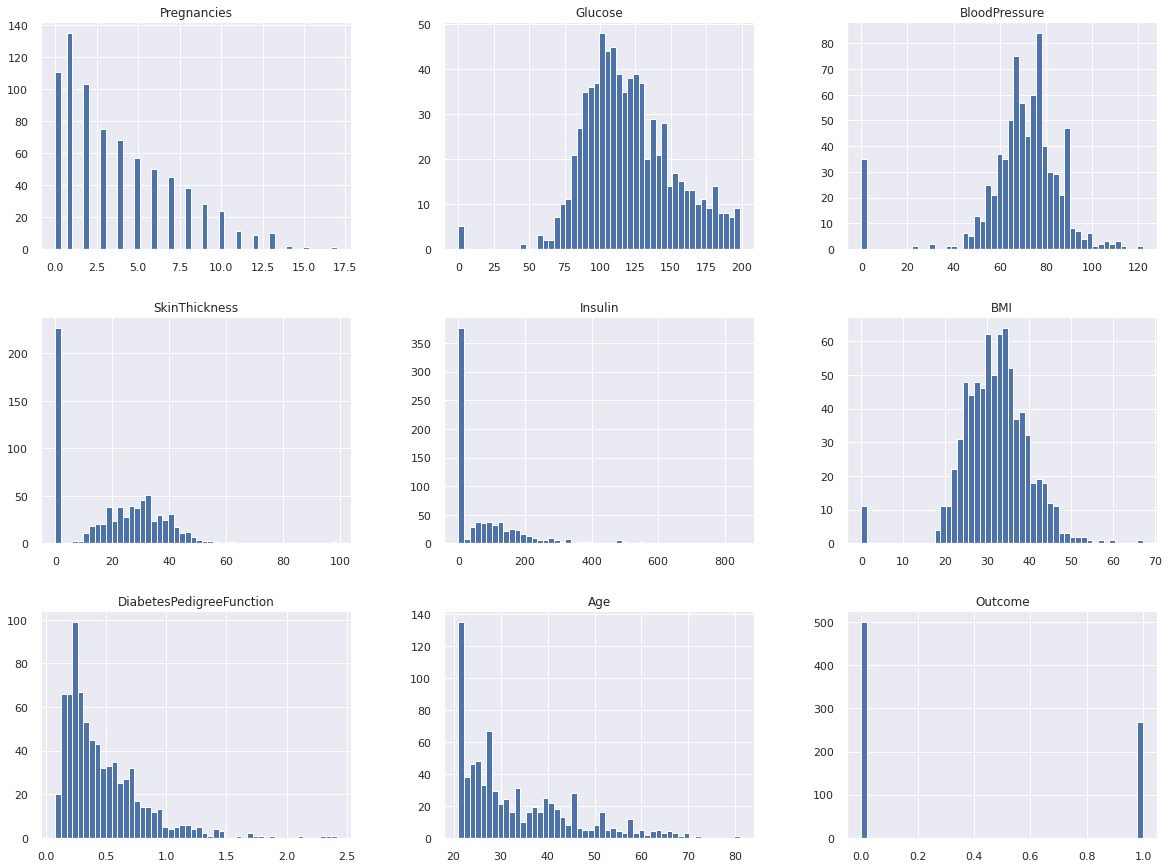

In [11]:
diabetes_data.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
#Find total number of zeros
# Count number of zeros in all columns of Dataframe
for column_name in diabetes_data.columns:
    column = diabetes_data[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column', column_name, ' is : ', count)

Count of zeros in column Pregnancies  is :  111
Count of zeros in column Glucose  is :  5
Count of zeros in column BloodPressure  is :  35
Count of zeros in column SkinThickness  is :  227
Count of zeros in column Insulin  is :  374
Count of zeros in column BMI  is :  11
Count of zeros in column DiabetesPedigreeFunction  is :  0
Count of zeros in column Age  is :  0
Count of zeros in column Outcome  is :  500


In [13]:
corr_matrix = diabetes_data.corr()
corr_matrix["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

#Stratified data split

In [14]:
#TEMPLATE - prepare X & y
X = diabetes_data.drop("Outcome",axis = 1)
y = diabetes_data.Outcome

In [15]:
#TEMPLATE - create a stratified split
from sklearn.model_selection import train_test_split
X_train_raw,X_test_raw,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)
#total rows: 768
#train set: 614
  #train set: 491
  #validation set: 123
#test set: 154

In [16]:
feature_names = list(diabetes_data.columns[:-1])
feature_target = list(diabetes_data.columns[-1:])

In [17]:
#TEMPLATE - verifying its a stratified split
def outcome_cat_proportions(data):
  return data.value_counts() / len(data)

compare_props = pd.DataFrame({
    "Overall": outcome_cat_proportions(diabetes_data["Outcome"]),
    "Train data": outcome_cat_proportions(y_train),
    "Test data": outcome_cat_proportions(y_test)
})
compare_props

,Overall,Train data,Test data
0,0.651042,0.651466,0.649351
1,0.348958,0.348534,0.350649


# Train Data cleaning

In [18]:
#TEMPLATE - cleaning remove zeros - replace with NaN
X_train = X_train_raw.copy(deep = True)
#TEMPLATE - copy new dataframe values
X_train[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = X_train[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [19]:
#replace na with mean() & Median()
X_train['Glucose'].fillna(X_train['Glucose'].mean(), inplace = True)
X_train['BloodPressure'].fillna(X_train['BloodPressure'].mean(), inplace = True)
X_train['SkinThickness'].fillna(X_train['SkinThickness'].median(), inplace = True)
X_train['Insulin'].fillna(X_train['Insulin'].median(), inplace = True)
X_train['BMI'].fillna(X_train['BMI'].median(), inplace = True)

In [20]:
#scale the inputs
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train =  pd.DataFrame(sc_X.fit_transform(X_train,),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

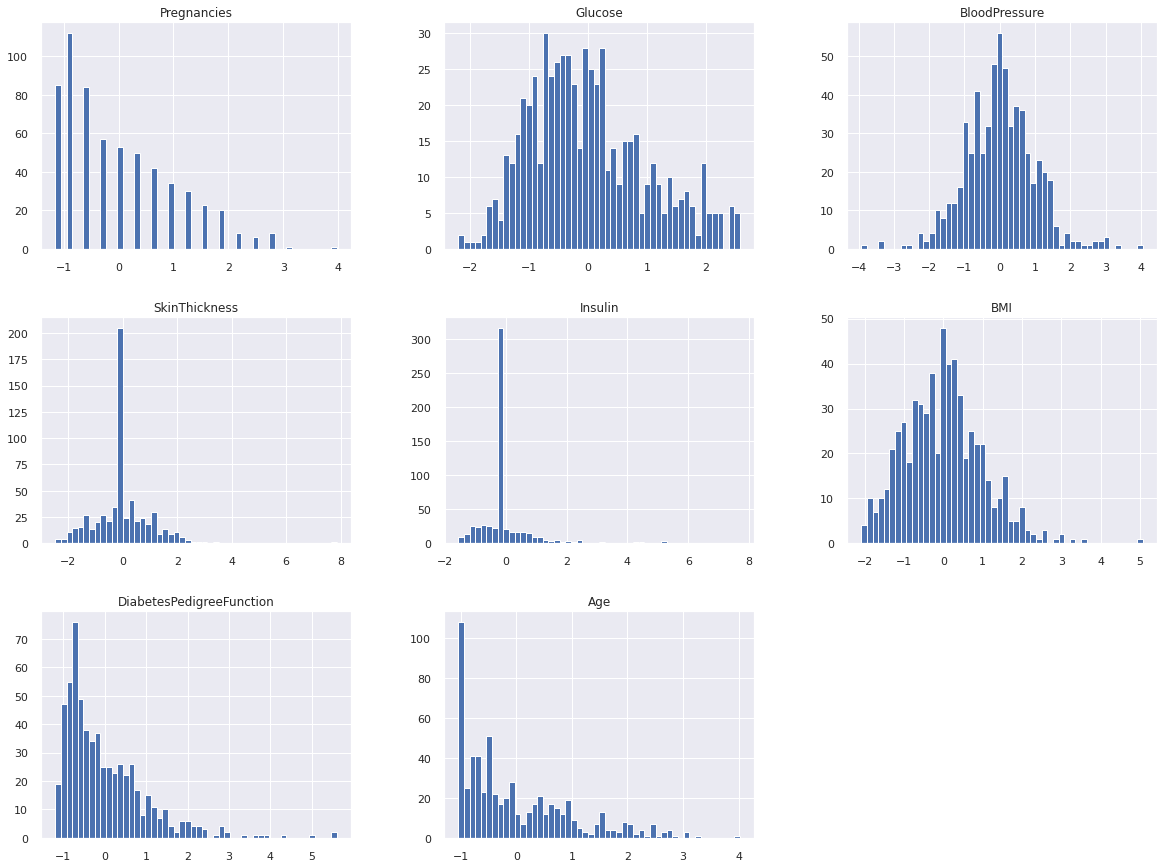

In [21]:
#show histogram without zeros
X_train.hist(bins=50, figsize=(20,15))
plt.show()

#Test Data Cleaning

In [22]:
#TEMPLATE - cleaning remove zeros - replace with NaN
X_test = X_test_raw.copy(deep = True)
#TEMPLATE - copy new dataframe values
X_test[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = X_test[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [23]:
#replace na with mean() & Median()
X_test['Glucose'].fillna(X_test['Glucose'].mean(), inplace = True)
X_test['BloodPressure'].fillna(X_test['BloodPressure'].mean(), inplace = True)
X_test['SkinThickness'].fillna(X_test['SkinThickness'].median(), inplace = True)
X_test['Insulin'].fillna(X_test['Insulin'].median(), inplace = True)
X_test['BMI'].fillna(X_test['BMI'].median(), inplace = True)

In [24]:
#scale the inputs
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_test =  pd.DataFrame(sc_X.fit_transform(X_test,),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

# Random search
Random search to find hyper parameters which may possibly work for further fine tuning

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

from sklearn.neural_network import MLPClassifier
rnd_mlp = MLPClassifier(max_iter=100,random_state=42)

param_distribs = {
    'hidden_layer_sizes': [(8,6), (12,8), (4,2)],
    'alpha': [0.0001, 0.05],
}
#defaults:
#learning_rate: constant
#alpha: 0.0001
#solver: adam
#activation: relu


rnd_search = RandomizedSearchCV(rnd_mlp, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='f1_weighted', random_state=42)
rnd_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multila

RandomizedSearchCV(cv=5, estimator=MLPClassifier(max_iter=100, random_state=42),
                   param_distributions={'alpha': [0.0001, 0.05],
                                        'hidden_layer_sizes': [(8, 6), (12, 8),
                                                               (4, 2)]},
                   random_state=42, scoring='f1_weighted')

In [26]:
rnd_search_df = pd.DataFrame({'param': rnd_search.cv_results_["params"], 'f1_weighted': rnd_search.cv_results_["mean_test_score"]})
rnd_search_df.sort_values(by=['f1_weighted'], ascending=False)

,param,f1_weighted
0,"{'hidden_layer_sizes': (8, 6), 'alpha': 0.0001}",0.772465
3,"{'hidden_layer_sizes': (8, 6), 'alpha': 0.05}",0.772424
1,"{'hidden_layer_sizes': (12, 8), 'alpha': 0.0001}",0.756727
4,"{'hidden_layer_sizes': (12, 8), 'alpha': 0.05}",0.754869
5,"{'hidden_layer_sizes': (4, 2), 'alpha': 0.05}",0.746293
2,"{'hidden_layer_sizes': (4, 2), 'alpha': 0.0001}",0.744385


In [27]:
rnd_search.best_estimator_

MLPClassifier(hidden_layer_sizes=(8, 6), max_iter=100, random_state=42)

# Grid search
Grid search to find best parameters


In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPClassifier

grid_mlp = MLPClassifier(max_iter=100,random_state=42)

param_distribs = {
    # 'hidden_layer_sizes': [(8,), (12,), (4,)],
    'hidden_layer_sizes': [(6,),(8,),(12,),(16,),(24,),(6,4),(8,6),(12,8),(16,8),(24,12)],
    'alpha': [0.0001, 0.001,0.01,0.1,1.0,10],
    'solver': ['lbfgs','adam']
}

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(grid_mlp, param_distribs, cv=5,
                           scoring='f1_weighted',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

In [27]:
grid_search_df = pd.DataFrame({'param': grid_search.cv_results_["params"], 'f1_weighted': grid_search.cv_results_["mean_test_score"]})
grid_search_df.sort_values(by=['f1_weighted'], ascending=False)

NameError: ignored

In [ ]:
grid_search.best_estimator_.get_params()

{'activation': 'relu',
 'alpha': 1.0,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (8, 6),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 100,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [ ]:
best_estimator = grid_search.best_estimator_
best_est_title = grid_search.best_params_

# Run Best Estimator

In [25]:
from sklearn.neural_network import MLPClassifier
#Based on grid search define best estimator for generating learning curves, confusion matrix & for final predict()
best_estimator = MLPClassifier(max_iter=1000,random_state=42, alpha=1.0, hidden_layer_sizes=(8,6),solver='adam')
best_est_title = '{alpha: 1.0, hidden_layer_sizes: (8, 6)}'

# best_estimator = grid_mlp = MLPClassifier(max_iter=100,random_state=42, early_stopping=True, alpha=1.0, hidden_layer_sizes=(8,6))
# best_est_title = '{alpha: 1.0, hidden_layer_sizes: (8, 6)}'

# Loss Curve

In [26]:
#fit the best model
best_estimator.fit(X_train,y_train)

MLPClassifier(alpha=1.0, hidden_layer_sizes=(8, 6), max_iter=1000,
              random_state=42)

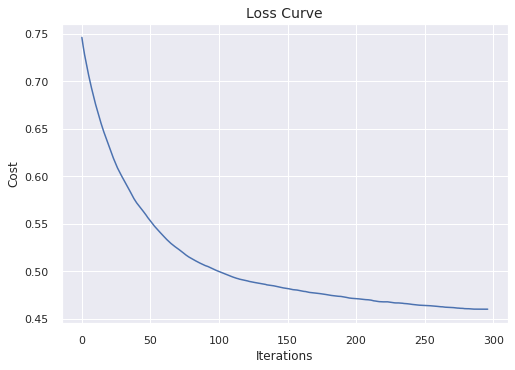

In [32]:
plt.plot(best_estimator.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.savefig('loss_curve.pdf')
plt.show()

In [78]:
weights = best_estimator.coefs_
print(len(weights[2][1]))

1


In [89]:
bias = best_estimator.intercepts_
print(len(bias[2]))
print(bias[2])

1
[-0.62857652]


# Learning Curve + Loss Curve
Based on grid search define best estimator for generating learning curves, confusion matrix & for final predict()

In [ ]:
from sklearn.model_selection import learning_curve

def learning_curves(estimator, data, features, y, cv,title):
   tot_col = 2
  #call learning curve function
   train_sizes, train_scores, validation_scores,fit_times, _ = learning_curve(estimator, data[features], y, cv = cv, scoring = 'f1_weighted', shuffle=True,return_times=True)
   #find the mean values
   train_scores_mean = train_scores.mean(axis = 1)
   validation_scores_mean = validation_scores.mean(axis = 1)
   fit_times_mean = fit_times.mean(axis = 1)
   #Plot-1 - Learning Curve: training error and validation error   
   plt.subplot(1,tot_col,(1))
   plt.plot(train_sizes, train_scores_mean, "o-", label = 'Training score')
   plt.plot(train_sizes, validation_scores_mean, "o-", label = 'Validation score')
   plt.ylabel('f1 weighted', fontsize = 14)
   plt.xlabel('Training set size', fontsize = 14)
  #  title = 'Learning curves for ' +  title
   plt.title(title, fontsize = 18, y = 1.03)
   plt.legend()
   plt.ylim(0,1.10)

   #Plot-2 - Scalability of the model - Plot n_samples vs fit_times
   plt.subplot(1,tot_col,(2))
   plt.plot(train_sizes, fit_times_mean, "o-", label = 'Training fit-times')
   plt.ylabel('fit_times', fontsize = 14)
   plt.xlabel('Training set size', fontsize = 14)
   plt.title("Scalability of the model", fontsize = 18, y = 1.03)
   plt.legend()
  #  plt.ylim(*ylim)

  #  #Plot-3 - Performance of the model - Plot fit_time vs score
  #  fit_time_argsort = fit_times_mean.argsort()
  #  fit_time_sorted = fit_times_mean[fit_time_argsort]
  #  validation_scores_mean_sorted = validation_scores_mean[fit_time_argsort]
  # #  test_scores_std_sorted = test_scores_std[fit_time_argsort]
  #  plt.subplot(1,tot_col,(3))
  #  plt.plot(fit_time_sorted, validation_scores_mean_sorted)
  #  plt.ylabel('fit_times', fontsize = 14)
  #  plt.xlabel('Score', fontsize = 14)
  #  plt.title("Performance of the model", fontsize = 18, y = 1.03)
  #  plt.legend()
  #  plt.ylim(*ylim)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

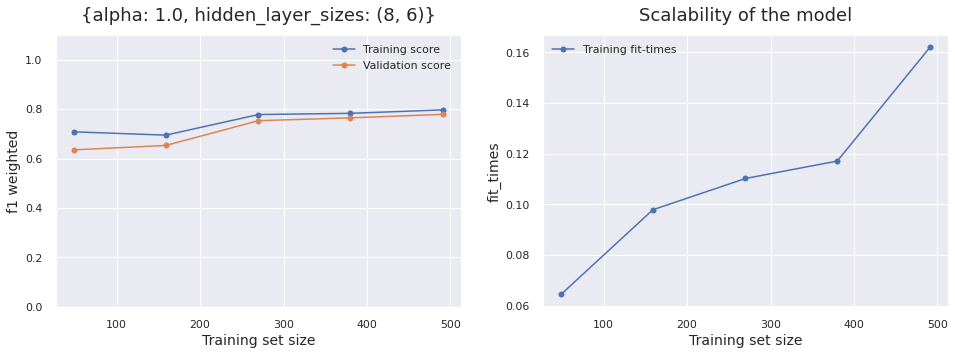

In [ ]:
#run learning_curves
plt.figure(figsize = (16,5))
learning_curves(best_estimator, X_train, feature_names, y_train, 5,best_est_title)

# # Plot Loss curve
# plt.subplot(1,3,3)
# plt.plot(best_estimator.loss_curve_)
# plt.title("Loss Curve", fontsize=14)
# plt.xlabel('Iterations')
# plt.ylabel('Cost')

plt.savefig('learning_curves.pdf')

# Confusion Matrix, Precisioin & Recall

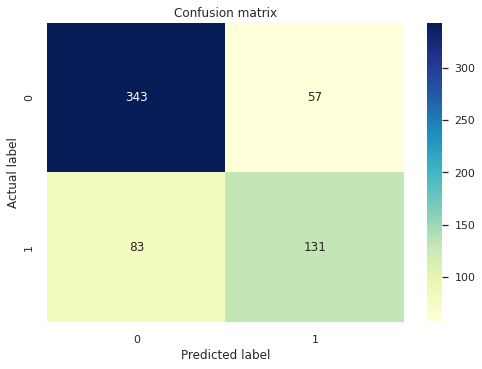

In [48]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

y_train_pred = cross_val_predict(best_estimator,X_train,y_train, cv=5)
cnf_matrix = metrics.confusion_matrix(y_train, y_train_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('confusion_matrix.pdf')

In [49]:
from sklearn.metrics import f1_score
f1_score(y_train,y_train_pred,average='weighted')

0.7682019977954867

In [50]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train,y_train_pred)

0.6968085106382979

In [51]:
recall_score(y_train,y_train_pred)

0.6121495327102804

classification_report

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       400
           1       0.70      0.61      0.65       214

    accuracy                           0.77       614
   macro avg       0.75      0.73      0.74       614
weighted avg       0.77      0.77      0.77       614



#Attributes about the classifier

In [47]:
print('current loss computed with the loss function: ',best_estimator.loss_)
print('coefs: ', best_estimator.coefs_)
print('intercepts: ',best_estimator.intercepts_)
print(' number of iterations the solver: ', best_estimator.n_iter_)
print('num of layers: ', best_estimator.n_layers_)
print('Num of o/p: ', best_estimator.n_outputs_)

current loss computed with the loss function:  0.45997063832441204
coefs:  [array([[ 3.13376263e-03,  1.05877874e-01, -6.27796858e-02,
         1.64569272e-01, -1.21427134e-01, -2.38978043e-01,
        -1.53540677e-01,  1.33068270e-01],
       [ 5.64576698e-03, -3.95973299e-02, -3.04664658e-01,
         5.99538455e-01,  1.92183670e-01, -4.00616817e-01,
        -4.61393539e-01, -1.13607623e-01],
       [ 8.76551455e-07,  7.00041580e-02,  6.47412589e-02,
        -8.84458851e-02, -7.46309243e-02, -1.23159233e-01,
        -1.20933912e-02, -4.20732935e-02],
       [-3.48382524e-03,  1.58247202e-02, -2.13032521e-01,
         5.67248036e-02, -1.48623618e-02, -1.26872282e-01,
         1.42597298e-01, -4.09514205e-02],
       [-7.59426976e-02,  2.63343396e-01,  3.40138547e-01,
         1.29708600e-01, -1.55500467e-01, -1.78397132e-01,
        -1.23228902e-01, -3.02614986e-02],
       [-4.55643675e-02, -9.84225700e-02, -2.91690136e-01,
         3.22393640e-01, -4.19854312e-02, -1.09981967e-01,
 

# Manual Validation Curve


In [ ]:
# STEP1: Generate hidden layer values
hidden_layers = [(8,),(8,8,8),(8,8,8,8,8),(8,8,8,8,8,8,8),(8,8,8,8,8,8,8,8,8),(8,8,8,8,8,8,8,8,8,8,8),(8,8,8,8,8,8,8,8,8,8,8,8,8),(8,8,8,8,8,8,8,8,8,8,8,8,8,8,8),(8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8)]
x_param_values = []
for hidden_layer in hidden_layers:
  x_param_values.append(len(hidden_layer))

x_param_values

[1, 3, 5, 7, 9, 11, 13, 15, 17]

In [ ]:
# # STEP2: Run validaiton_curves
# param_name = 'hidden_layer_sizes'
# param_range = hidden_layers
# rnd_mlp = MLPClassifier(max_iter=100,random_state=42, hidden_layer_sizes=hidden_layer)
# train_scores, validation_scores  = validation_curve(rnd_mlp, X_train[feature_names], y_train, param_name=param_name, param_range=param_range, cv = 2, scoring = 'f1_weighted')
# train_scores_mean = train_scores.mean(axis = 1)
# validation_scores_mean = validation_scores.mean(axis = 1)

In [ ]:
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score

def run_cross_validation(rnd_mlp,X_train,y_train,no_of_folds=3):
  #step1: use stratified split to test & validation
  X_train_cv,X_valid_cv,y_train_cv,y_valid_cv = train_test_split(X_train,y_train,test_size=0.2,random_state=42,stratify=y_train, shuffle=True)
  # #initialize new MLP Classifier 
  # #step2: use cross val score() to cv validate separately to get test score
  train_scores = cross_val_score(rnd_mlp,X_train_cv,y_train_cv,cv=no_of_folds,scoring="f1_weighted")
  train_score_mean = sum(train_scores)/len(train_scores)
  # #step3: use cross val score() to cv validate separately to get validation score
  valid_scores = cross_val_score(rnd_mlp,X_valid_cv,y_valid_cv,cv=no_of_folds,scoring="f1_weighted")
  valid_score_mean = sum(valid_scores)/len(valid_scores)
  return train_score_mean, valid_score_mean


# #step4: create list object for hidden_layers values
# #step4: create list object for x-axis param values
train_scores_mean = [] 
validation_scores_mean = []
# #step5: generate MLP Classifiers for each hidden layer
for hidden_layer in hidden_layers:
  rnd_mlp = MLPClassifier(max_iter=100,random_state=42, hidden_layer_sizes=hidden_layer)
  train_score_mean, valid_score_mean = run_cross_validation(rnd_mlp,X_train,y_train,no_of_folds=3)
  train_scores_mean.append(train_score_mean)
  validation_scores_mean.append(valid_score_mean)

# #step5: create list object for y-axis test score param values
# #step6: create list object for y-axis validation score param values
# print(len(X_train.shape[0],y_train.shape[0] )
# print(len(train_scores), len(valid_scores), len(hidden_layers))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

(0.1, 1.0)

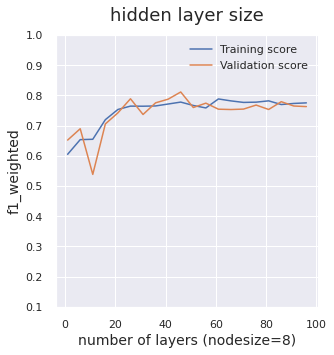

In [ ]:
#plot figures
plt.figure(figsize = (16,5))
#plot hidden layer
plt.subplot(1,3,1)
# Plot training error and validation error   
plt.plot(x_param_values, train_scores_mean,label = 'Training score')
plt.plot(x_param_values, validation_scores_mean, label = 'Validation score')
# provide x & y labels
plt.ylabel('f1_weighted', fontsize = 14)
plt.xlabel("number of layers (nodesize=8)", fontsize = 14)
title =  "hidden layer size"
plt.title(title, fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.1,1.0)



# Validation Curve
generate validation curve to develop intuition for analysis

In [ ]:
from sklearn.model_selection import validation_curve

def validation_curves(estimator, data, features, y,param_name, xax_param_name, param_range,invert_axis,xscale,ylimt):
   #call valiidation curve function
   train_scores, validation_scores = validation_curve(estimator, data[features], y, param_name=param_name, param_range=param_range, cv = 5, scoring = 'f1_weighted')
   train_scores_mean = train_scores.mean(axis = 1)
   validation_scores_mean = validation_scores.mean(axis = 1)
   #Plot training error and validation error   
   plt.plot(param_range, train_scores_mean,label = 'Training score')
   plt.plot(param_range, validation_scores_mean, label = 'Validation score')
   # provide x & y labels
   plt.ylabel('f1_weighted', fontsize = 14)
   plt.xlabel(xax_param_name, fontsize = 14)
   ax = plt.gca()
   if xscale == 'log':
     ax.set_xscale('log')
   if invert_axis:
     ax.invert_xaxis()
   title =  param_name
   plt.title(title, fontsize = 18, y = 1.03)
   plt.legend()
   plt.ylim(ylimt[0],ylimt[1])


In [ ]:
#test 
np.arange(0.001, 1, 0.005)
np.logspace(-5, 2, 20)


array([1.00000000e-05, 2.33572147e-05, 5.45559478e-05, 1.27427499e-04,
       2.97635144e-04, 6.95192796e-04, 1.62377674e-03, 3.79269019e-03,
       8.85866790e-03, 2.06913808e-02, 4.83293024e-02, 1.12883789e-01,
       2.63665090e-01, 6.15848211e-01, 1.43844989e+00, 3.35981829e+00,
       7.84759970e+00, 1.83298071e+01, 4.28133240e+01, 1.00000000e+02])

In [ ]:
# STEP1: Generate hidden layer values (one layer only)
hidden_layers = []
x_param_values = []
first_layer = np.arange(1,100,5)
# second_layer = np.arange(1,20,2)
for i in zip(first_layer):
  hidden_layers.append(tuple(i))
  x_param_values.append(i)
hidden_layers

[(1,),
 (6,),
 (11,),
 (16,),
 (21,),
 (26,),
 (31,),
 (36,),
 (41,),
 (46,),
 (51,),
 (56,),
 (61,),
 (66,),
 (71,),
 (76,),
 (81,),
 (86,),
 (91,),
 (96,)]

In [ ]:
np.logspace(-5, 1, 15)

array([1.00000000e-05, 2.68269580e-05, 7.19685673e-05, 1.93069773e-04,
       5.17947468e-04, 1.38949549e-03, 3.72759372e-03, 1.00000000e-02,
       2.68269580e-02, 7.19685673e-02, 1.93069773e-01, 5.17947468e-01,
       1.38949549e+00, 3.72759372e+00, 1.00000000e+01])

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

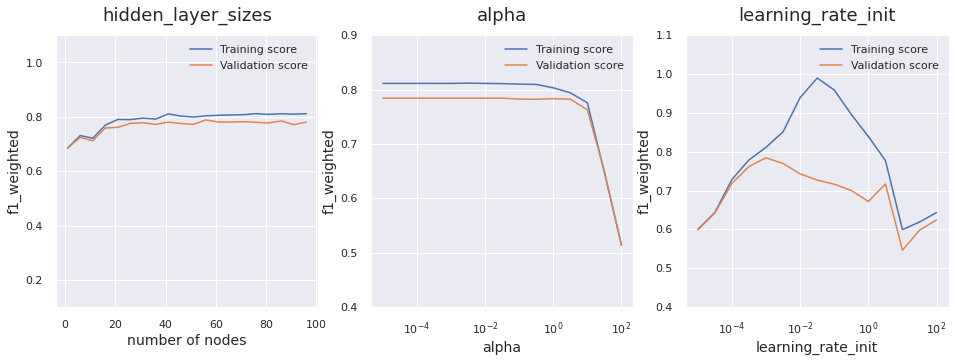

In [ ]:
#execute validation curves
plt.figure(figsize = (16,5))
vld_mlp = MLPClassifier(max_iter=100,random_state=42)

#value of one : (vld_mlp,"alpha", np.logspace(-5, 2, 15), 0,False,"log",(0.4,0.9))

for model, param_name, xax_param_name, param_range,i,invert_axis,xscale,ylimt in [(vld_mlp,"hidden_layer_sizes", "number of nodes", hidden_layers, 0,False,None,(0.1,1.10)),(vld_mlp,"alpha", "alpha", np.logspace(-5, 2, 15), 1,False,"log",(0.4,0.9)),(vld_mlp,"learning_rate_init", "learning_rate_init", np.logspace(-5, 2, 15), 2,False,"log",(0.4,1.10))]:
    plt.subplot(1,3,(i+1))
    validation_curves(model, X_train, feature_names, y_train, param_name, xax_param_name, param_range,invert_axis,xscale,ylimt)
plt.savefig('validation_curves.pdf')

#Test set prediction

In [40]:
#fit the best model
best_estimator.fit(X_train,y_train)

MLPClassifier(alpha=1.0, hidden_layer_sizes=(8, 6), max_iter=1000,
              random_state=42)

In [53]:
#use the model to predict
y_test_pred = best_estimator.predict(X_test)

In [54]:
#calculate weighted f1 score weighted
from sklearn.metrics import f1_score
f1_score(y_test,y_test_pred,average='weighted')

0.7026069066533982

In [55]:
precision_score(y_test,y_test_pred)

0.5957446808510638

In [56]:
recall_score(y_test,y_test_pred)

0.5185185185185185

#References


*   MPLClassifiers SkiKit Learn: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html 

